In [1]:
from urllib.request import urlopen, Request
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from urllib.request import urlopen
from matplotlib import pyplot as plt
import math
import datetime
from time import sleep
import copy
import json
import sys
import csv
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr   
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.utils import shuffle
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns; sns.set(color_codes=True)
from statsmodels.stats.stattools import durbin_watson

In [2]:
df = pd.read_csv("data_f.csv")

<Figure size 1152x576 with 0 Axes>

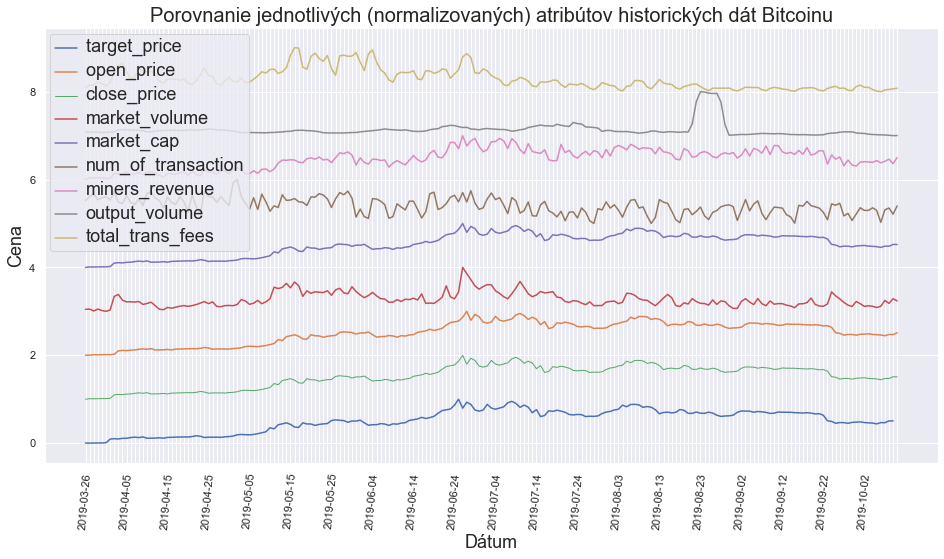

In [8]:
plt.figure(figsize=(16, 8))
scaler = MinMaxScaler()
plt.figure(figsize=(16, 8))

df['target_price'] = df['close_price'].shift(-1)
df['target_price'] = scaler.fit_transform(df[['target_price']])

df['close_price']=scaler.fit_transform(df[['close_price']])+1
df['open_price'] = scaler.fit_transform(df[['open_price']])+2
df['market_volume'] = scaler.fit_transform(df[['market_volume']])+3
df['market_cap'] = scaler.fit_transform(df[['market_cap']])+4
df['num_of_transaction'] = scaler.fit_transform(df[['num_of_transaction']])+5
df['miners_revenue'] = scaler.fit_transform(df[['miners_revenue']])+6
df['output_volume'] = scaler.fit_transform(df[['output_volume']])+7
df['total_trans_fees'] = scaler.fit_transform(df[['total_trans_fees']])+8

g =sns.lineplot(df['date'], y=(df['target_price']), label = "target_price ")
g =sns.lineplot(df['date'], y=(df['open_price']), label = "open_price ")
g =sns.lineplot(df['date'], y=(df['close_price']), label = 'close_price', linewidth=1)
g =sns.lineplot(df['date'], y=(df['market_volume']), label = 'market_volume')
g =sns.lineplot(df['date'], y=(df['market_cap']), label = 'market_cap')
g =sns.lineplot(df['date'], y=(df['num_of_transaction']), label = 'num_of_transaction')
g =sns.lineplot(df['date'], y=(df['miners_revenue']), label = 'miners_revenue')
g =sns.lineplot(df['date'], y=(df['output_volume']), label = 'output_volume')
g =sns.lineplot(df['date'], y=(df['total_trans_fees']), label = 'total_trans_fees')

plt.xticks(rotation='85')
g.set_title('Porovnanie jednotlivých (normalizovaných) atribútov historických dát Bitcoinu', fontsize = 20)
g.set_ylabel("Cena", fontsize = 18) 
g.set_xlabel("Dátum", fontsize = 18) 
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.setp(g.get_legend().get_texts(), fontsize='18')
plt.show()

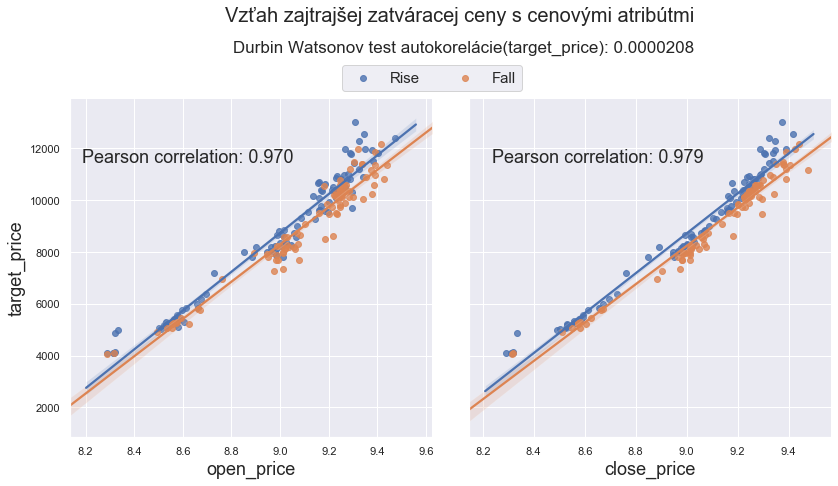

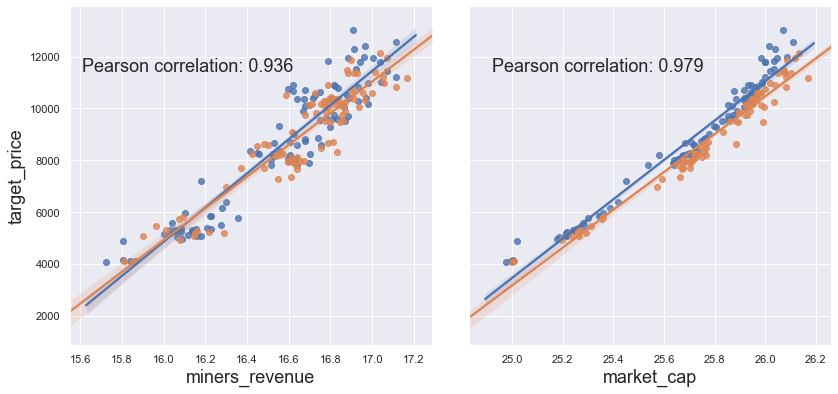

In [102]:
df = pd.read_csv("data_f.csv")

df['price_move']= np.append(np.diff(df['close_price']), 0)
df['price_move'] = np.where(df.price_move>=0, 'Rise', 'Fall')

df['target_price'] = df['close_price'].shift(-1)
#df['target_status'] = df

df['open_price'] = np.log(df.open_price)
df['close_price'] = np.log(df.close_price)
df['miners_revenue'] = np.log(df.miners_revenue)
df['market_cap'] = np.log(df.market_cap)

a = "Pearson correlation: %.3f" % df['target_price'].corr(df.open_price)
b = "Pearson correlation: %.3f" % df['target_price'].corr(df.close_price)
c = "Pearson correlation: %.3f" % df['target_price'].corr(df.miners_revenue)
d = "Pearson correlation: %.3f" % df['target_price'].corr(df.market_cap)
a1 = "Durbin Watsonov test autokorelácie(target_price): %.7f" % durbin_watson(df.close_price)

g = sns.pairplot(data=df,
                y_vars =['target_price'],
                x_vars =['open_price', 'close_price'],
                kind="reg",  hue ='price_move')
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2, fontsize = 15, bbox_to_anchor=(0.4,0.85))

for ax in plt.gcf().axes:
    x = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(x, fontsize=18)
    ax.set_ylabel(y, fontsize=18)


plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.fig.suptitle("Vzťah zajtrajšej zatváracej ceny s cenovými atribútmi", y=1.10, x= 0.5, fontsize =20)
g.fig.text(0.29, 1.01, a1, fontsize=17)
g.fig.set_size_inches(15,7)

g.fig.text(0.15, 0.79,a, fontsize=18)
g.fig.text(0.53, 0.79,b, fontsize=18)


g = sns.pairplot(data=df,
                y_vars =['target_price'],
                x_vars =['miners_revenue', 'market_cap'],
                kind="reg", hue ='price_move')
g._legend.remove()

handles = g._legend_data.values()
labels = g._legend_data.keys()

plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.fig.set_size_inches(15,7)

g.fig.text(0.15, 0.79,c, fontsize=18)
g.fig.text(0.53, 0.79,d, fontsize=18)

for ax in plt.gcf().axes:
    x = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(x, fontsize=18)
    ax.set_ylabel(y, fontsize=18)



8678.36190954774


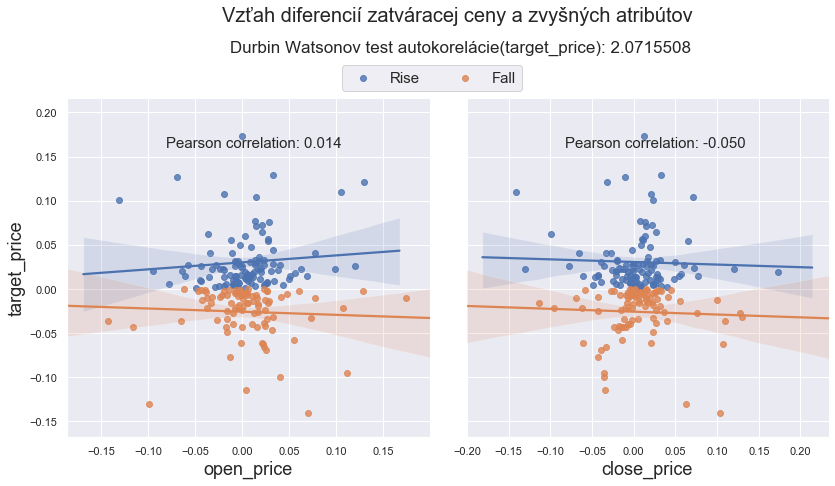

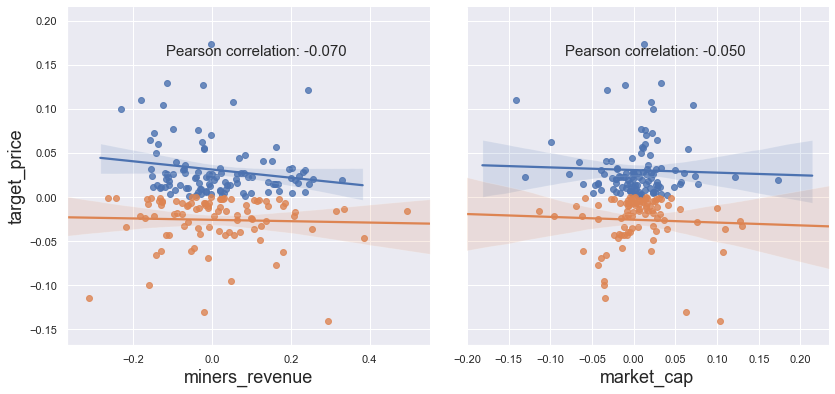

In [107]:
df = pd.read_csv("data_f.csv")
print(df.close_price.mean())

df['price_move']= np.append(np.diff(df['close_price']), 0)
df['price_move'] = np.where(df.price_move>=0, 'Rise', 'Fall')

df['target_price'] = df.close_price.pct_change().shift(-1)
df.target_price  = df.target_price.fillna(df.target_price.mean())

df['open_price'] = df.open_price.pct_change().fillna(0)
df['close_price'] = df.close_price.pct_change().fillna(0)
df['miners_revenue'] = df.miners_revenue.pct_change().fillna(0)
df['market_cap'] = df.market_cap.pct_change().fillna(0)

a = "Pearson correlation: %.3f" % df['target_price'].corr(df.open_price)
b = "Pearson correlation: %.3f" % df['target_price'].corr(df.close_price)
c = "Pearson correlation: %.3f" % df['target_price'].corr(df.miners_revenue)
d = "Pearson correlation: %.3f" % df['target_price'].corr(df.market_cap)
a1 = "Durbin Watsonov test autokorelácie(target_price): %.7f" % durbin_watson(df.target_price)

g = sns.pairplot(data=df,
                y_vars =['target_price'],
                x_vars =['open_price', 'close_price'],
                kind="reg", hue = 'price_move')

g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2, fontsize = 15, bbox_to_anchor=(0.4,0.85))

for ax in plt.gcf().axes:
    x = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(x, fontsize=18)
    ax.set_ylabel(y, fontsize=18)

plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.fig.suptitle("Vzťah diferencií zatváracej ceny a zvyšných atribútov",y=1.10, x= 0.5, fontsize =20)
g.fig.text(0.29, 1.01, a1, fontsize=17)
g.fig.set_size_inches(15,7)

g.fig.text(0.23, 0.82,a, fontsize=15)
g.fig.text(0.60, 0.82,b, fontsize=15)

g = sns.pairplot(data=df,
                y_vars =['target_price'],
                x_vars =['miners_revenue', 'market_cap'],
                kind="reg", hue = 'price_move')
plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.fig.set_size_inches(15,7)

g.fig.text(0.23, 0.82, c, fontsize=15)
g.fig.text(0.60, 0.82, d, fontsize=15)

g._legend.remove()
for ax in plt.gcf().axes:
    x = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(x, fontsize=18)
    ax.set_ylabel(y, fontsize=18)


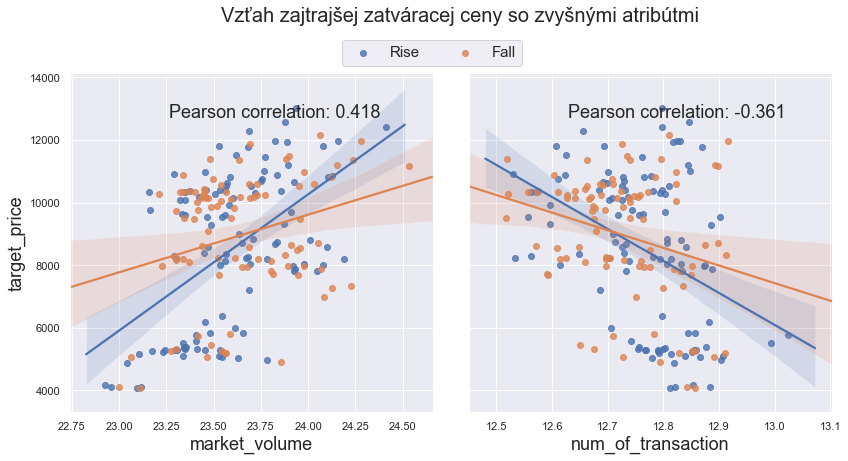

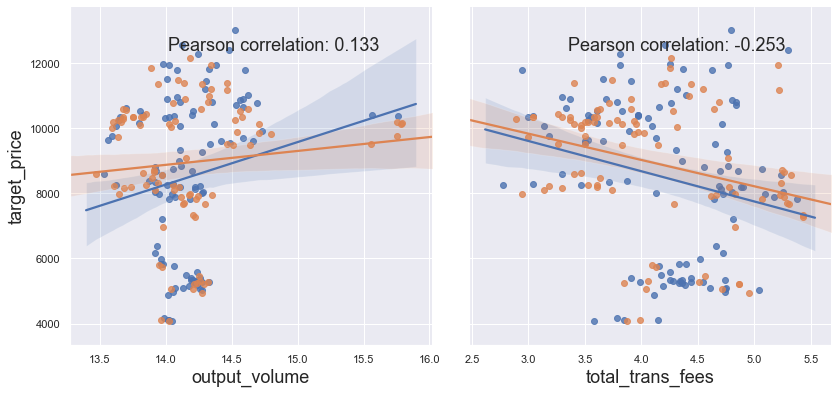

In [112]:
df = pd.read_csv("data_f.csv")

df['price_move']= np.append(np.diff(df['close_price']), 0)
df['price_move'] = np.where(df.price_move>=0, 'Rise', 'Fall')

df['target_price'] = df['close_price'].shift(-1)
df['target_direction'] = df.close_price.pct_change().shift(-1)
df.target_direction  = df.target_direction.fillna(df.target_direction.mean())
df['target_direction'] = np.where(df.target_direction >=0 , 'rise', 'fall')

#df['target_price'] = np.log(df.target_price)
df['market_volume'] = np.log(df.market_volume)
df['num_of_transaction'] = np.log(df.num_of_transaction)
df['output_volume'] = np.log(df.output_volume)
df['total_trans_fees'] = np.log(df.total_trans_fees)

a = "Pearson correlation: %.3f" % df['target_price'].corr(df.market_volume)
b = "Pearson correlation: %.3f" % df['target_price'].corr(df.num_of_transaction)
c = "Pearson correlation: %.3f" % df['target_price'].corr(df.output_volume)
d = "Pearson correlation: %.3f" % df['target_price'].corr(df.total_trans_fees)

g = sns.pairplot(data=df,
                y_vars =['target_price'],
                x_vars =['market_volume', 'num_of_transaction'],
                kind="reg", hue = 'price_move')

g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2, fontsize = 15, bbox_to_anchor=(0.4,0.85))

for ax in plt.gcf().axes:
    x = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(x, fontsize=18)
    ax.set_ylabel(y, fontsize=18)
    
    
plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.fig.set_size_inches(15,7)
g.fig.suptitle("Vzťah zajtrajšej zatváracej ceny so zvyšnými atribútmi",y=1.05, x= 0.5, fontsize =20)

g.fig.text(0.23, 0.83,a, fontsize=18)
g.fig.text(0.60, 0.83,b, fontsize=18)

g = sns.pairplot(data=df,
                y_vars =['target_price'],
                x_vars =['output_volume', 'total_trans_fees'],
                kind="reg", hue = 'price_move')

plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.fig.set_size_inches(15,7)
g.fig.text(0.23, 0.83,c, fontsize=18)
g.fig.text(0.60, 0.83,d, fontsize=18)

g._legend.remove()
for ax in plt.gcf().axes:
    x = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(x, fontsize=18)
    ax.set_ylabel(y, fontsize=18)

In [150]:
df.head()

date  open_price  close_price  market_volume    market_cap  \
0  2019-03-26     3969.23      3985.08      23.094227  7.018415e+10   
1  2019-03-27     3984.24      4087.07      23.111765  7.198785e+10   
2  2019-03-28     4087.58      4069.11      22.959061  7.167900e+10   
3  2019-03-29     4068.30      4098.37      23.113740  7.220209e+10   
4  2019-03-30     4092.14      4106.66      22.998756  7.235519e+10   

   dayOfWeek_sin  dayOfWeek_cos  is_Weekend  num_of_transaction  \
0       0.781831       0.623490           0           12.811522   
1       0.974928      -0.222521           0           12.856276   
2       0.433884      -0.900969           0           12.883339   
3      -0.433884      -0.900969           0           12.820764   
4      -0.974928      -0.222521           1           12.842075   

   d_num_of_transaction  ...  xrp_open_price  xrp_close_price   xrp_volume  \
0                     0  ...        0.303808         0.305060  761000017.0   
1                 16771  ...        0.305421         0.312465  781951318.0   
2                 10512  ...        0.312383         0.309246  677929379.0   
3                -23881  ...        0.309269         0.307929  854583316.0   
4                  7966  ...        0.307655         0.310632  929122633.0   

   xrp_market_cap  d_xrp_open_price  d_xrp_close_price  d_xrp_volume  \
0    1.272299e+10          0.000000           0.000000           0.0   
1    1.303183e+10          0.001613           0.007405    20951301.0   
2    1.289761e+10          0.006962          -0.003219  -104021939.0   
3    1.284265e+10         -0.003114          -0.001317   176653937.0   
4    1.295539e+10         -0.001614           0.002703    74539317.0   

   d_xrp_market_cap  target_price  target_direction  
0               0.0       4087.07              rise  
1       308841275.0       4069.11              fall  
2      -134220158.0       4098.37              rise  
3       -54962215.0       4106.66              rise  
4       112745850.0       4105.40              fall  

[5 rows x 150 columns]

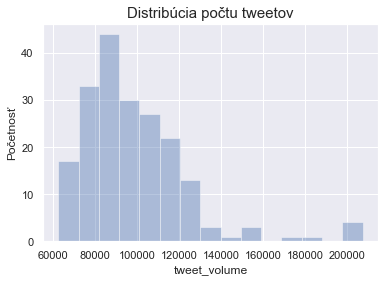

In [16]:
ax = sns.distplot((df.tweet_volume), kde=False, norm_hist=False)
ax.set_title('Distribúcia počtu tweetov', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("tweet_volume") 
plt.show()

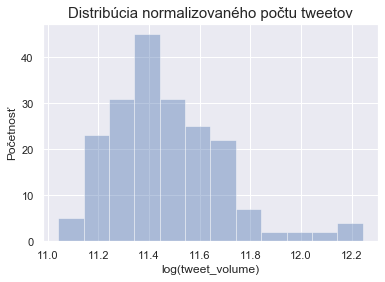

In [17]:
ax = sns.distplot(np.log(df.tweet_volume), kde=False, norm_hist=False)
ax.set_title('Distribúcia normalizovaného počtu tweetov', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("log(tweet_volume)") 
plt.show()

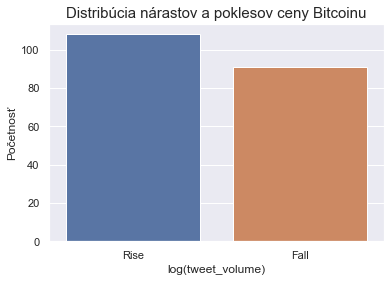

In [77]:
dftf = df.copy()
df['target'] = np.append(np.diff(df['close_price']), 0)
dftf['rise/fall'] = np.where(df['target']>=0, 'Rise', 'Fall')
ax = sns.countplot(dftf['rise/fall'])
ax.set_title('Distribúcia nárastov a poklesov ceny Bitcoinu', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("log(tweet_volume)") 
plt.show()

Text(0.5, 0, 'log(tweet_volume)')

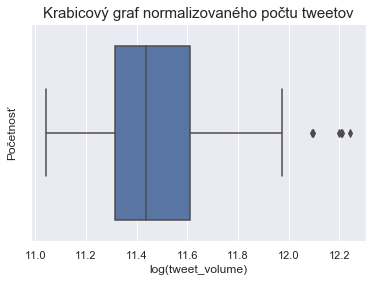

In [18]:
ax = sns.boxplot(x=np.log(df.tweet_volume))
ax.set_title('Krabicový graf normalizovaného počtu tweetov', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("log(tweet_volume)") 

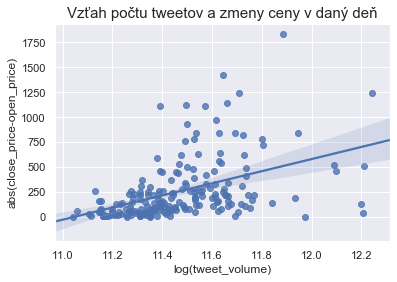

In [19]:
x = np.log(df.tweet_volume)
y = np.abs(df.close_price-df.open_price)
x, y = pd.Series(x, name="log(tweet_volume)"), pd.Series(y, name="abs(close_price-open_price)")
ax = sns.regplot(x=x, y=y).set_title('Vzťah počtu tweetov a zmeny ceny v daný deň', fontsize = 15)


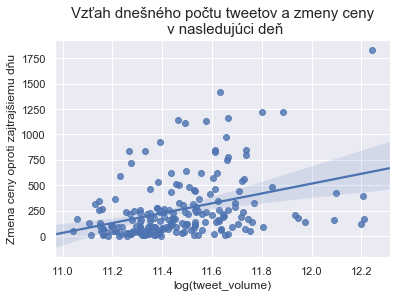

In [20]:
x = np.log(df.tweet_volume)
y = np.abs(np.append(np.diff(df['close_price']), 0))
x, y = pd.Series(x, name="log(tweet_volume)"), pd.Series(y, name="Zmena ceny oproti zajtrajšiemu dňu")
ax = sns.regplot(x=x, y=y).set_title('Vzťah dnešného počtu tweetov a zmeny ceny\n v nasledujúci deň', fontsize = 15)

In [21]:
df.tweet_volume.sum()

19564852

(199, 32)


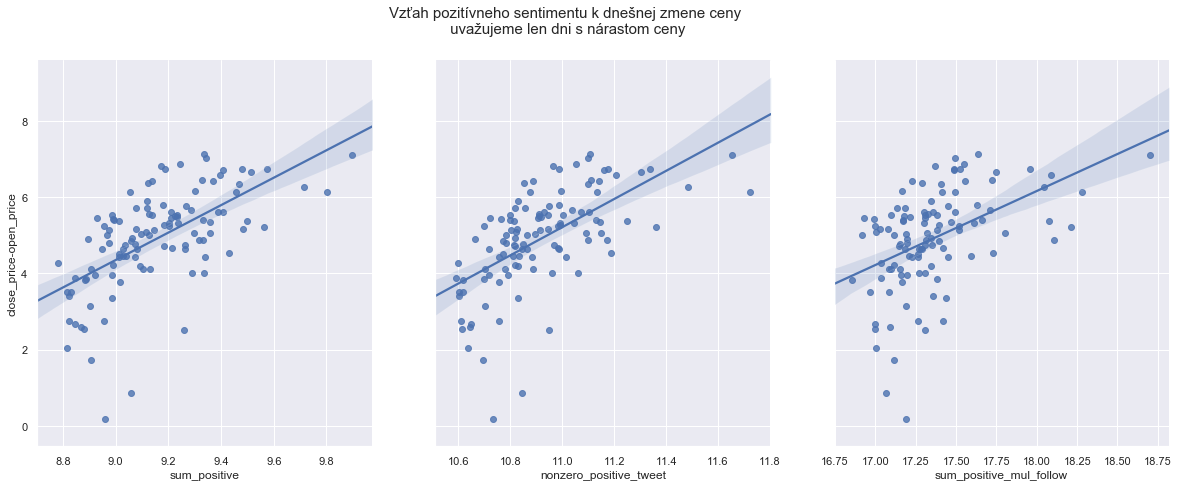

In [70]:
df = pd.read_csv("data_f.csv")
dft = df[['date', 'close_price','tweet_volume', 'nonzero_neutral_tweet', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow', 'sum_neutral_mul_follow', 'sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_neutral', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_neutral', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_neutral', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_neutral_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_neutral_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['close_price-open_price']= df.close_price-df.open_price
print(dft.shape)
dff = dft.loc[dft['close_price-open_price'] >= 1.0]

dfth = dff[['close_price-open_price','sum_positive','nonzero_positive_tweet', 'sum_positive_mul_follow', 'avg_sum_positive', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_positive_mul_follow']].copy()
dfth['close_price-open_price'] = np.log(dfth['close_price-open_price'])
dfth.sum_positive = np.log(dfth.sum_positive)
dfth.nonzero_positive_tweet = np.log(dfth.nonzero_positive_tweet)    
dfth.sum_positive_mul_follow = np.log(dfth.sum_positive_mul_follow)  
g = sns.pairplot(data=dfth,
                y_vars =['close_price-open_price'],
                x_vars =['sum_positive', 'nonzero_positive_tweet', 'sum_positive_mul_follow'],
                kind="reg")
g.fig.suptitle("Vzťah pozitívneho sentimentu k dnešnej zmene ceny\n uvažujeme len dni s nárastom ceny", y=1.01, fontsize =15)

g.fig.set_size_inches(18,8)

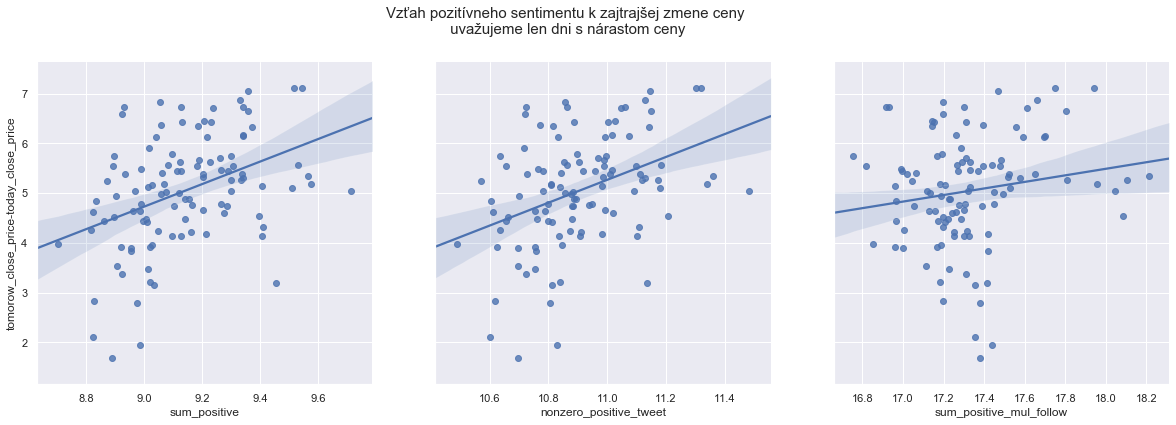

In [71]:
df = pd.read_csv("data_f.csv")
dft = df[['date', 'close_price','tweet_volume', 'nonzero_neutral_tweet', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow', 'sum_neutral_mul_follow', 'sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_neutral', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_neutral', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_neutral', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_neutral_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_neutral_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['tomorow_close_price-today_close_price']= np.append(np.diff(df['close_price']), 0)
dff = dft.loc[dft['tomorow_close_price-today_close_price'] >= 1.0]

dfth = dff[['tomorow_close_price-today_close_price','sum_positive','nonzero_positive_tweet', 'sum_positive_mul_follow', 'avg_sum_positive', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_positive_mul_follow']].copy()
dfth['tomorow_close_price-today_close_price'] = np.log(dfth['tomorow_close_price-today_close_price'])
dfth.sum_positive = np.log(dfth.sum_positive)
dfth.nonzero_positive_tweet = np.log(dfth.nonzero_positive_tweet)    
dfth.sum_positive_mul_follow = np.log(dfth.sum_positive_mul_follow)  
g = sns.pairplot(data=dfth,
                y_vars =['tomorow_close_price-today_close_price'],
                x_vars =['sum_positive', 'nonzero_positive_tweet', 'sum_positive_mul_follow'],
                kind="reg")
g.fig.suptitle("Vzťah pozitívneho sentimentu k zajtrajšej zmene ceny\n uvažujeme len dni s nárastom ceny", y=0.8, fontsize =15)

g.fig.set_size_inches(18,10)

C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Pearson correlation: 0.230
Pearson correlation: 0.142
Pearson correlation: 0.380


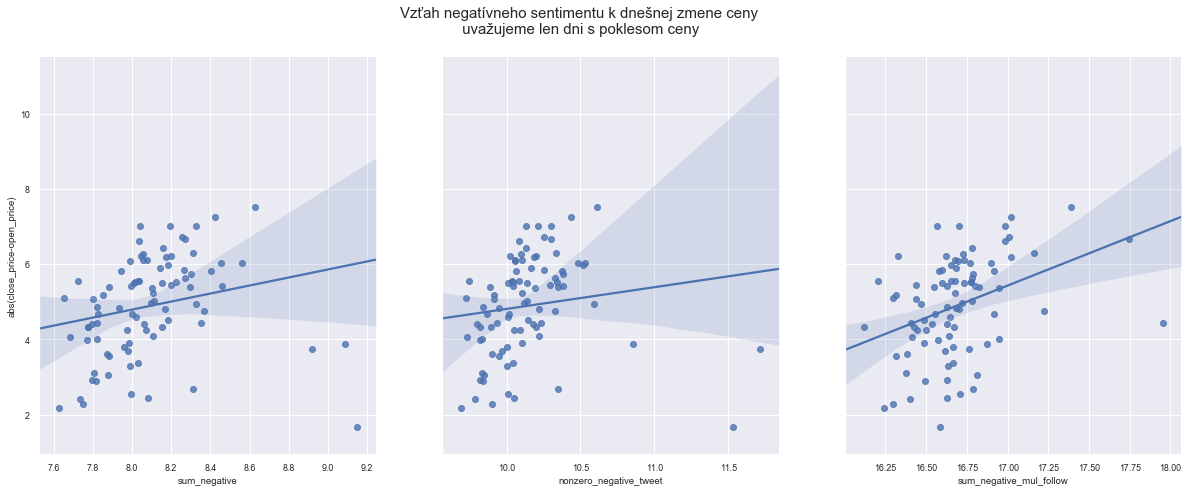

In [88]:
df = pd.read_csv("data_f.csv")
dft = df[['date','open_price', 'close_price','tweet_volume', 'nonzero_neutral_tweet', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow', 'sum_neutral_mul_follow', 'sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_neutral', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_neutral', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_neutral', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_neutral_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_neutral_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['abs(close_price-open_price)']= dft.close_price-df.open_price
dff = dft.loc[dft['abs(close_price-open_price)'] <= -1.0]
dff['abs(close_price-open_price)'] = np.abs(dff['abs(close_price-open_price)'])

dfth = dff[['abs(close_price-open_price)','sum_negative','nonzero_negative_tweet', 'sum_negative_mul_follow', 'avg_sum_negative', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_negative_mul_follow']].copy()
dfth['abs(close_price-open_price)'] = np.log(dfth['abs(close_price-open_price)'])
dfth.sum_negative = np.log(dfth.sum_negative)
dfth.nonzero_negative_tweet = np.log(dfth.nonzero_negative_tweet)    
dfth.sum_negative_mul_follow = np.log(dfth.sum_negative_mul_follow)  
g = sns.pairplot(data=dfth,
                y_vars =['abs(close_price-open_price)'],
                x_vars =['sum_negative', 'nonzero_negative_tweet', 'sum_negative_mul_follow'],
                kind="reg")
g.fig.suptitle("Vzťah negatívneho sentimentu k dnešnej zmene ceny\n uvažujeme len dni s poklesom ceny", y=1.01, fontsize =15)

g.fig.set_size_inches(18,8)
print("Pearson correlation: %.3f" % dfth['abs(close_price-open_price)'].corr(dfth.sum_negative))
print("Pearson correlation: %.3f" % dfth['abs(close_price-open_price)'].corr(dfth.nonzero_negative_tweet))
print("Pearson correlation: %.3f" % dfth['abs(close_price-open_price)'].corr(dfth.sum_negative_mul_follow))

C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Pearson correlation: 0.353
Pearson correlation: 0.335
Pearson correlation: 0.162


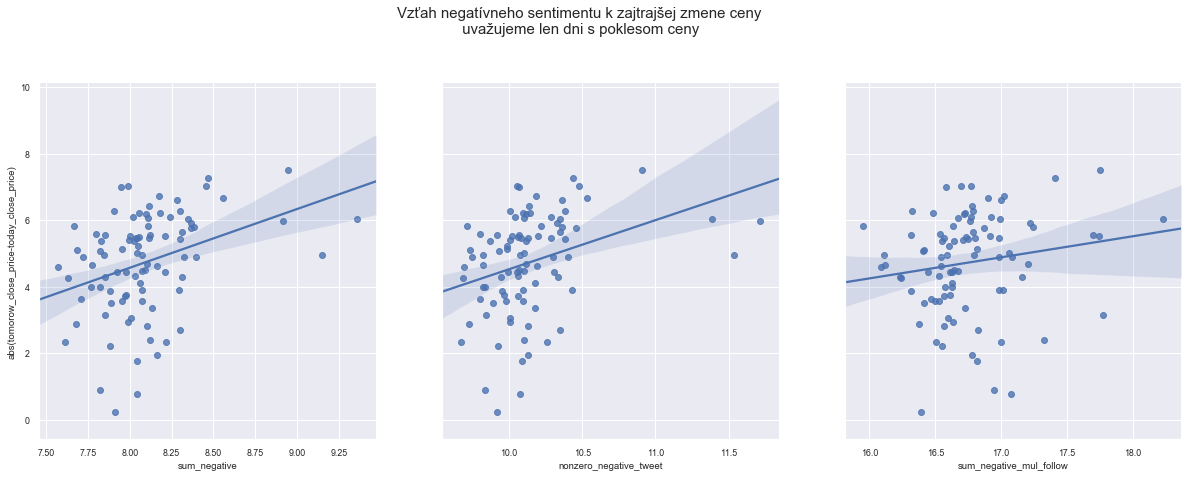

In [92]:
df = pd.read_csv("data_f.csv")
dft = df[['date', 'close_price','tweet_volume', 'nonzero_neutral_tweet', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow', 'sum_neutral_mul_follow', 'sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_neutral', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_neutral', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_neutral', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_neutral_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_neutral_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['abs(tomorow_close_price-today_close_price)']= np.append(np.diff(df['close_price']), 0)
dff = dft.loc[dft['abs(tomorow_close_price-today_close_price)'] <= -1.0]
dff['abs(tomorow_close_price-today_close_price)'] = np.abs(dff['abs(tomorow_close_price-today_close_price)'])

dfth = dff[['abs(tomorow_close_price-today_close_price)','sum_negative','nonzero_negative_tweet', 'sum_negative_mul_follow', 'avg_sum_negative', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_negative_mul_follow']].copy()
dfth['abs(tomorow_close_price-today_close_price)'] = np.log(dfth['abs(tomorow_close_price-today_close_price)'])
dfth.sum_negative = np.log(dfth.sum_negative)
dfth.nonzero_negative_tweet = np.log(dfth.nonzero_negative_tweet)    
dfth.sum_negative_mul_follow = np.log(dfth.sum_negative_mul_follow)  
g = sns.pairplot(data=dfth,
                y_vars =['abs(tomorow_close_price-today_close_price)'],
                x_vars =['sum_negative', 'nonzero_negative_tweet', 'sum_negative_mul_follow'],
                kind="reg")
g.fig.suptitle("Vzťah negatívneho sentimentu k zajtrajšej zmene ceny\n uvažujeme len dni s poklesom ceny", y=0.9, fontsize =15)

g.fig.set_size_inches(18,9)
print("Pearson correlation: %.3f" % dfth['abs(tomorow_close_price-today_close_price)'].corr(dfth.sum_negative))
print("Pearson correlation: %.3f" % dfth['abs(tomorow_close_price-today_close_price)'].corr(dfth.nonzero_negative_tweet))
print("Pearson correlation: %.3f" % dfth['abs(tomorow_close_price-today_close_price)'].corr(dfth.sum_negative_mul_follow))

Text(0.5, 1, 'Korelačná matica pre twitter atribúty \n Pearsonov koeficient')

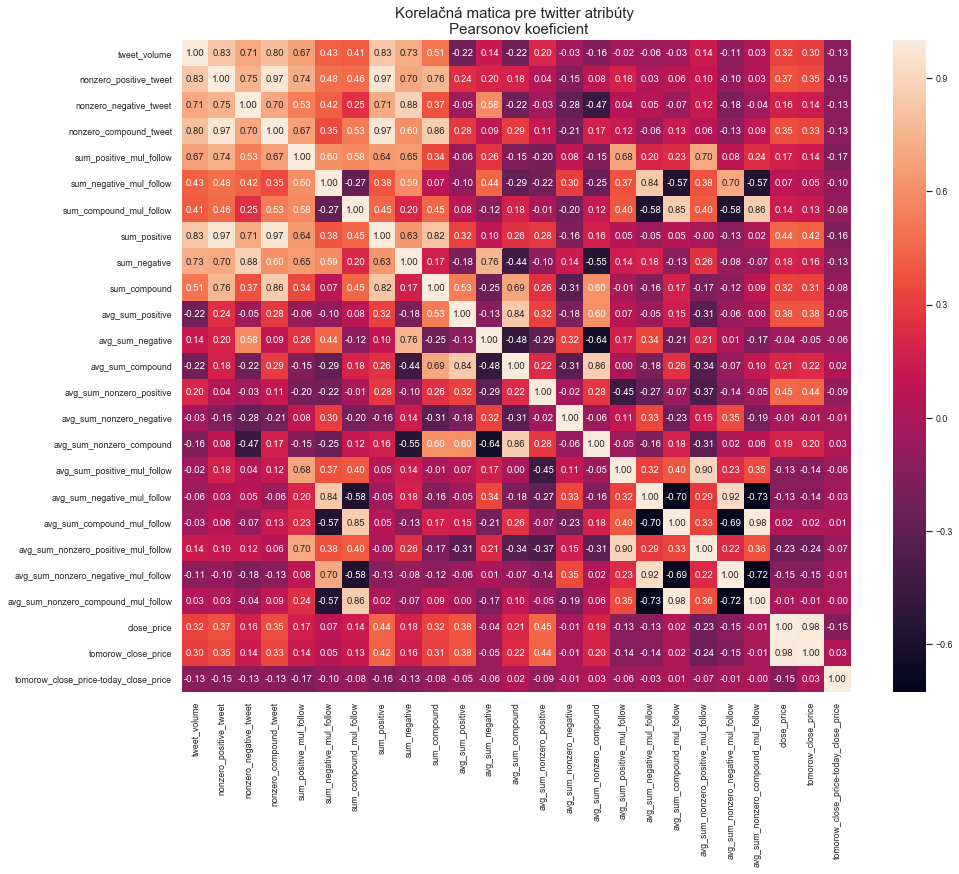

In [115]:
df = pd.read_csv("data_f.csv")
dft = df[['tweet_volume', 'nonzero_positive_tweet', 'nonzero_negative_tweet', 'nonzero_compound_tweet', 'sum_positive_mul_follow','sum_negative_mul_follow', 'sum_compound_mul_follow', 'sum_positive', 'sum_negative', 'sum_compound', 'avg_sum_positive', 'avg_sum_negative', 'avg_sum_compound', 'avg_sum_nonzero_positive', 'avg_sum_nonzero_negative', 'avg_sum_nonzero_compound', 'avg_sum_positive_mul_follow', 'avg_sum_negative_mul_follow', 'avg_sum_compound_mul_follow', 'avg_sum_nonzero_positive_mul_follow', 'avg_sum_nonzero_negative_mul_follow', 'avg_sum_nonzero_compound_mul_follow']].copy()
dft['close_price'] = df.close_price.copy()
dft['tomorow_close_price'] = dft['close_price'].shift(-1)
dft['tomorow_close_price-today_close_price']= np.append(np.diff(df['close_price']), 0)


fig, ax = plt.subplots(figsize=(15,12))
ax=sns.heatmap(dft.corr(), ax=ax, annot=True, fmt=".2f")
sns.set(font_scale=0.8)
ax.set_title('Korelačná matica pre twitter atribúty \n Pearsonov koeficient', fontsize = 15)


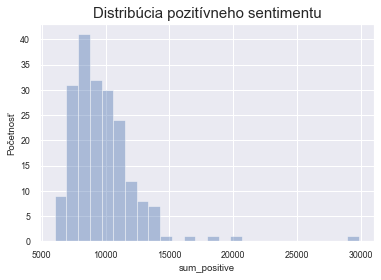

In [110]:
ax = sns.distplot(dft.sum_positive, kde=False, norm_hist=False)
ax.set_title('Distribúcia pozitívneho sentimentu', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("sum_positive") 
plt.show()

Pearson correlation: 0.421


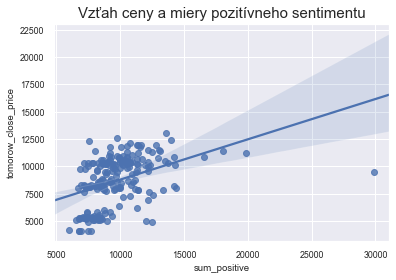

In [114]:
x = (dft.sum_positive)
y = (dft.tomorow_close_price)
ax = sns.regplot(x=x, y = y ).set_title('Vzťah ceny a miery pozitívneho sentimentu', fontsize = 15)
print("Pearson correlation: %.3f" % x.corr(y))

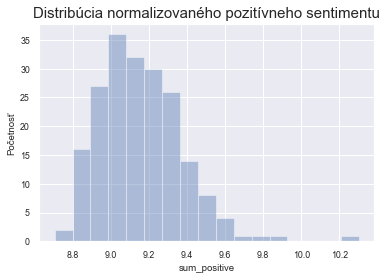

In [120]:
ax = sns.distplot(np.log(dft.sum_positive), kde=False, norm_hist=False)
ax.set_title('Distribúcia normalizovaného pozitívneho sentimentu', fontsize = 15)
ax.set_ylabel("Početnosť") 
ax.set_xlabel("sum_positive") 
plt.show()


Pearson correlation: 0.497


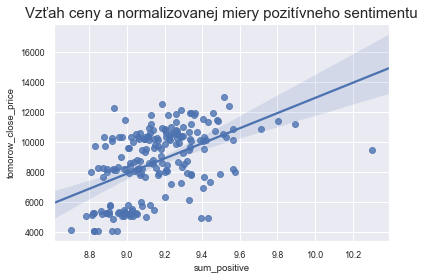

In [126]:
x = (np.log(dft.sum_positive))
y = ((dft.tomorow_close_price))
ax = sns.regplot(x=x, y = y ).set_title('Vzťah ceny a normalizovanej miery pozitívneho sentimentu', fontsize = 15)
print("Pearson correlation: %.3f" % x.corr(y))

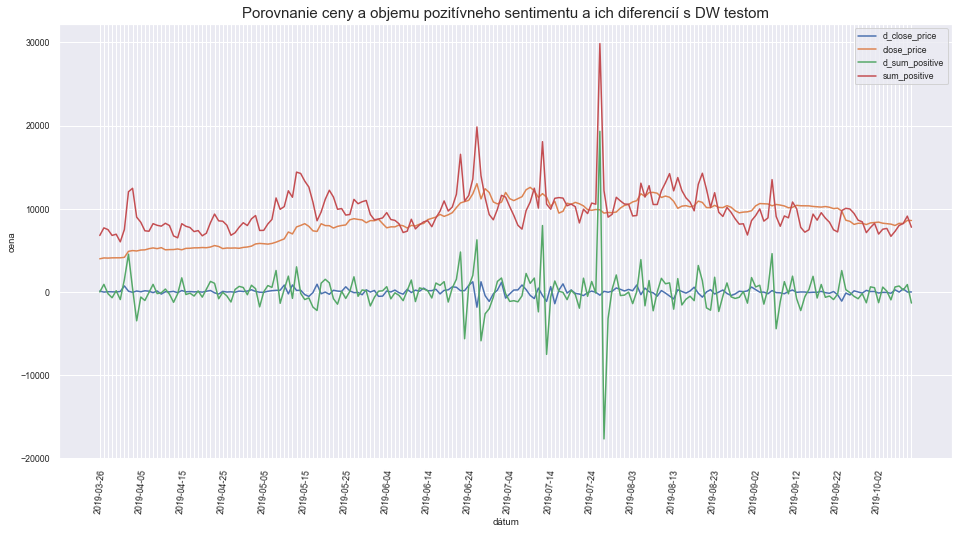

Durbin Watsonov test autokorelácie(close_price): 0.002
Durbin Watsonov test autokorelácie(d_close_price): 2.198
Durbin Watsonov test autokorelácie(sum_positive): 0.063
Durbin Watsonov test autokorelácie(d_sum_positive): 2.659


In [173]:
df = pd.read_csv("data_f.csv")
scaler = MinMaxScaler()
df['d_close_price']= np.append(np.diff(df['close_price']), 0)
df['d_sum_positive']= np.insert(np.diff(df['sum_positive']), 0, 0)


plt.figure(figsize=(16, 8))
#df['close_price'] = scaler.fit_transform(df[['close_price']])
#df['d_close_price'] = scaler.fit_transform(df[['d_close_price']])

g =sns.lineplot(df['date'], y=df['d_close_price'], label = 'd_close_price')
g =sns.lineplot(df['date'], y=df['close_price'], label = 'close_price')

g =sns.lineplot(df['date'], y=df['d_sum_positive'], label = 'd_sum_positive')
g =sns.lineplot(df['date'], y=df['sum_positive'], label = 'sum_positive')

plt.xticks(rotation='85')
g.set_title('Porovnanie ceny a objemu pozitívneho sentimentu a ich diferencií s DW testom', fontsize = 15)
g.set_ylabel("cena") 
g.set_xlabel("dátum") 
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()

print("Durbin Watsonov test autokorelácie(close_price): %.3f" % durbin_watson(df.close_price))
print("Durbin Watsonov test autokorelácie(d_close_price): %.3f" % durbin_watson(df.d_close_price))
print("Durbin Watsonov test autokorelácie(sum_positive): %.3f" % durbin_watson(df.sum_positive))
print("Durbin Watsonov test autokorelácie(d_sum_positive): %.3f" % durbin_watson(df.d_sum_positive))

C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


Pearson correlation: -0.021


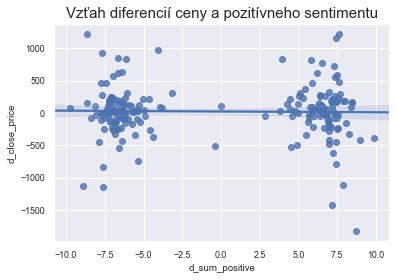

In [194]:
df = pd.read_csv("data_f.csv")
scaler = MinMaxScaler()
df['d_close_price']= np.append(np.diff(df['close_price']), 0)
df['d_sum_positive']= np.insert(np.diff(df['sum_positive']), 0, 1)

#df['d_close_price'] = scaler.fit_transform(df[['d_close_price']])
#df['d_sum_positive'] = scaler.fit_transform(df[['d_sum_positive']])

df['log'] = df['d_sum_positive']
#df['log'] = np.where(df['log']==0.0, df['log'].mean, df['log'])
df['d_sum_positive'] = np.where(df['log']>=0, np.log(df['log']), np.log(np.abs(df['log']))*-1)

x = ((df.d_sum_positive))
y = ((df.d_close_price))
ax = sns.regplot(x=x, y = y ).set_title('Vzťah diferencií ceny a pozitívneho sentimentu', fontsize = 15)
print("Pearson correlation: %.3f" % x.corr(y))

In [219]:
df = pd.read_csv("data_f.csv")
print(df.sum_positive.mean())
print(df.sum_negative.mean())
print(df.sum_positive.min())
print(df.sum_negative.min())
df['d_close_price']= np.append(np.diff(df['close_price']), 0)
dff = df.loc[ (df['d_close_price'] <= 20.0) & (df['d_close_price'] >= -20.0) ]
print(dff.shape)
print(dff.sum_compound.mean())

#sum_positive = 8300
#sum_negative = 2900
#compound 18098

9744.471291457283
3389.2802462311574
6022.0109999999995
1943.379
(19, 149)
18098.172042105263


C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


Pearson correlation: -0.087


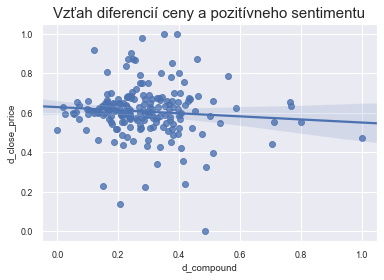

In [244]:
df = pd.read_csv("data_f.csv")
scaler = MinMaxScaler()
df['d_close_price']= np.append(np.diff(df['close_price']), 0)
df['d_close_price']= scaler.fit_transform(df[['d_close_price']])
df['d_tweet_volume']= np.insert(np.diff(df['tweet_volume']), 0,0)
df['d_sum_positive']= df.sum_positive - 8300
df['d_sum_negative']= df.sum_negative - 2900
df['d_compound'] = df.tweet_volume * (df.avg_sum_nonzero_positive-df.avg_sum_nonzero_negative)
df['d_compound'] = np.where(df['d_compound']>=0, np.log(df['d_compound']), np.log(np.abs(df['d_compound']))*-1)
df = df.loc[ (df['d_compound'] >7.5) ]
df.d_compound=scaler.fit_transform(df[['d_compound']])
x = ((df.d_compound))
y = ((df.d_close_price))
ax = sns.regplot(x=x, y = y ).set_title('Vzťah diferencií ceny a pozitívneho sentimentu', fontsize = 15)
print("Pearson correlation: %.3f" % x.corr(y))